In [59]:
import pandas as pd 
import numpy as np
import joblib as jb
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [60]:
MinMaxScaler_model=jb.load('D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/model/train_min_Species_model.pkl')
StandardScaler_model=jb.load('D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/model/train_Standard_Species_model.pkl')
model=jb.load('D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/train/model/svm_model.pkl')

In [61]:
def flow(X_path):
    # read 
    data=pd.read_csv(X_path)
    #Outlier removed 
    q1=data['SepalWidthCm'].quantile(0.25)
    q3=data['SepalWidthCm'].quantile(0.75)
    IQR=q3-q1
    lower_range=q1-1.5*IQR
    upper_range=q3+IQR
    #Capping 
    data['SepalWidthCm']=np.where(data['SepalWidthCm']<lower_range,lower_range,
                         np.where(data['SepalWidthCm']>upper_range,upper_range,
                                  data['SepalWidthCm']))
    # data split 
    x_test=data.drop('Species',axis=1).copy()
    y_test=data['Species'].copy()
    #Map fuction 
    y_test=y_test.replace({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2})
    # minmax scaler 
    min_Species=MinMaxScaler_model.transform(x_test)
    min_species_df=pd.DataFrame(min_Species,columns=x_test.columns)
    # Standard
    Standard_Species=StandardScaler_model.transform(min_species_df)
    Standard_Species_df=pd.DataFrame(Standard_Species,columns=min_species_df.columns)
    # prediction
    y_pred=pd.DataFrame(model.predict(Standard_Species_df))
    Y_pred=y_pred.replace({0:'Iris-versicolor',1:'Iris-setosa',2:'Iris-virginica'})
    Y_pred=Y_pred.rename(columns={0: 'Species'})
    # metrices 
    classification_rep = classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
   
   
    return  Y_pred, classification_rep,cm,disp

In [63]:
X_test_path ='D:/DS NOTE/OASIS INFO BYTE/Iris Flower Classification/test/Raw/test.csv'
Y_pred,classification_rep,cm,disp=flow(X_test_path)

In [64]:
Y_pred

,Species
0,Iris-versicolor
1,Iris-virginica
2,Iris-versicolor
3,Iris-versicolor
4,Iris-virginica
...,...
70,Iris-versicolor
71,Iris-virginica
72,Iris-versicolor
73,Iris-versicolor


In [65]:
classification_rep
print(classification_rep)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        23
           1       1.00      1.00      1.00        28
           2       1.00      0.71      0.83        24

    accuracy                           0.91        75
   macro avg       0.92      0.90      0.90        75
weighted avg       0.93      0.91      0.90        75



In [66]:
cm

array([[23,  0,  0],
       [ 0, 28,  0],
       [ 7,  0, 17]], dtype=int64)

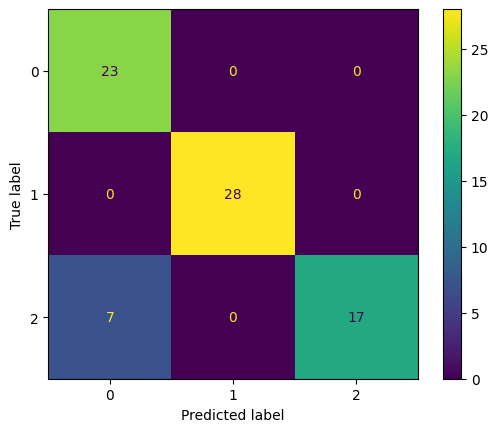

In [67]:
disp
disp.plot()
plt.show()